This program is based on the kaggle phishing dataset https://www.kaggle.com/shashwatwork/phishing-dataset-for-machine-learning/

More information about the dataset can be found at https://arxiv.org/ftp/arxiv/papers/1608/1608.02196.pdf 

In [ ]:
!pip install sklearn

In [4]:
#Import Dataset
import pandas as pd
from google.colab import drive
import os
import csv
drive.mount('/content/drive', force_remount=True)

import sklearn
import numpy as np

import tempfile
import os
from collections import defaultdict


file_path = os.path.join(os.getcwd(), "drive", "My Drive", "Phishing_Detector") # replace based on your Google drive organization
print(os.listdir(file_path)[:1])

def read_txt(fname):
  with open(fname) as open_article:
    lines = open_article.read()
  return lines

def read_csv(fname):
  return pd.read_csv(fname)


article_file = "Phishing_Legitimate_full.csv"
article_file = os.path.join(file_path, article_file)
dataset = read_csv(article_file)





Mounted at /content/drive
['Phishing_Legitimate_full.csv']


In [5]:
#LOGISTIC REGRESSION MODEL


from tqdm import tnrange, tqdm_notebook
from time import sleep
import warnings
warnings.filterwarnings('ignore')

#Create Logistic Regression Classifier
feature_string = "NumDots	SubdomainLevel	PathLevel	UrlLength	NumDash	NumDashInHostname	AtSymbol	TildeSymbol	NumUnderscore	NumPercent	NumQueryComponents	NumAmpersand	NumHash	NumNumericChars	NoHttps	RandomString	IpAddress	DomainInSubdomains	DomainInPaths	HttpsInHostname	HostnameLength	PathLength	QueryLength	DoubleSlashInPath	NumSensitiveWords	EmbeddedBrandName	PctExtHyperlinks	PctExtResourceUrls	ExtFavicon	InsecureForms	RelativeFormAction	ExtFormAction	AbnormalFormAction	PctNullSelfRedirectHyperlinks	FrequentDomainNameMismatch	FakeLinkInStatusBar	RightClickDisabled	PopUpWindow	SubmitInfoToEmail	IframeOrFrame	MissingTitle	ImagesOnlyInForm	SubdomainLevelRT	UrlLengthRT	PctExtResourceUrlsRT	AbnormalExtFormActionR	ExtMetaScriptLinkRT	PctExtNullSelfRedirectHyperlinksRT"
f_dic = feature_string.split()
#print(f_dic)

datax = dataset[f_dic]
datay = dataset.CLASS_LABEL

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(datax,datay,test_size=0.3,random_state=0)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)


logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#

y_pred=logreg.predict(X_test)


from sklearn import metrics


#class_names=[0,1] # name  of classes


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



acc = []
pre = []
rec = []
for num in tnrange(500, desc="Evaluating Iter Limit"):
  logreg = LogisticRegression(solver='lbfgs', max_iter=num+1)

  logreg.fit(X_train,y_train)

  y_pred=logreg.predict(X_test)

  acc.append(metrics.accuracy_score(y_test, y_pred))
  pre.append(metrics.precision_score(y_test, y_pred))
  rec.append(metrics.recall_score(y_test, y_pred))











Accuracy: 0.937
Precision: 0.9314621409921671
Recall: 0.9444076770350761


Evaluating Iter Limit:   0%|          | 0/500 [00:00<?, ?it/s]

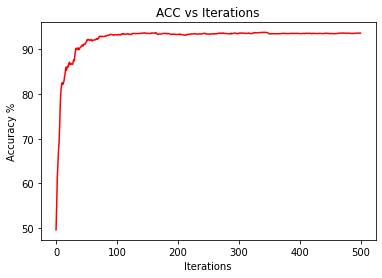

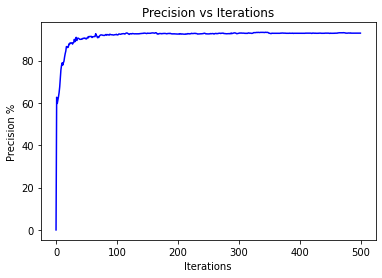

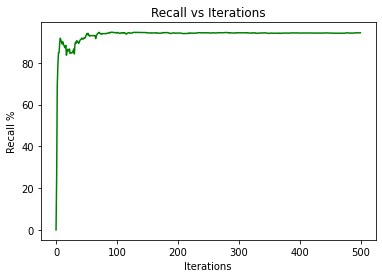

In [6]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0,len(acc))
acc = np.array(acc)
y = (acc[x])*100
 
# plotting
plt.title("ACC vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy %")
plt.plot(x, y, color ="red")
plt.show()

# data to be plotted
x = np.arange(0,len(pre))
pre = np.array(pre)
y = pre[x]*100
 
# plotting
plt.title("Precision vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Precision %")
plt.plot(x, y, color ="blue")
plt.show()

# data to be plotted
x = np.arange(0,len(rec))
rec = np.array(rec)
y = rec[x]*100
 
# plotting
plt.title("Recall vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Recall %")
plt.plot(x, y, color ="green")
plt.show()


[[ 0.43765179 -0.88147046  0.37660207 -0.10462211 -0.50342537  1.29610083
  -0.46568565  1.91336955 -0.11955177 -0.79201348 -1.52229105  0.87057263
   0.62235682  0.01301021 -2.92020396 -0.28517356  1.38295036  0.43128915
  -0.52478386  0.          0.18292676  0.13214756  0.15187573  0.2623363
   1.9731405  -0.68639979 -3.57390044 -2.20396208  2.21106641  4.02033335
  -0.74886613 -0.85685897 -0.72328638 -0.78643337  5.32925988 -0.87843597
  -0.06663685 -0.72330286 -3.51463318 -1.51775519  1.84043602  0.44694268
   0.24715447  0.68815203  0.25947267  0.36705292  0.55648794 -2.5596947 ]]
Feature: 0, Score: 0.43765
Feature: 1, Score: -0.88147
Feature: 2, Score: 0.37660
Feature: 3, Score: -0.10462
Feature: 4, Score: -0.50343
Feature: 5, Score: 1.29610
Feature: 6, Score: -0.46569
Feature: 7, Score: 1.91337
Feature: 8, Score: -0.11955
Feature: 9, Score: -0.79201
Feature: 10, Score: -1.52229
Feature: 11, Score: 0.87057
Feature: 12, Score: 0.62236
Feature: 13, Score: 0.01301
Feature: 14, Score

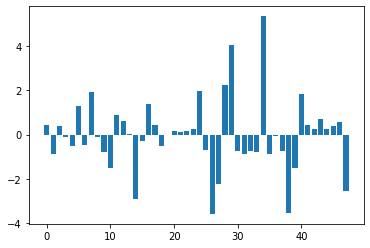

In [7]:
#CALCULATE MOST IMPORTANT FEATURES
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import pickle

# get importance
importance = logreg.coef_
# summarize feature importance
print(importance)
for i,v in enumerate(importance[0]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

def saveFeatureImportance():
  filename = 'iterationEffect'
  outfile = open(filename,'wb')
  saved = {"accuracy":acc, "precision":pre, "recall":rec}
  pickle.dump(saved,outfile)
  outfile.close()

#saveFeatureImportance() #D




>1 0.931 (0.012)
>2 0.939 (0.010)
>3 0.948 (0.009)
>4 0.956 (0.009)
>5 0.963 (0.007)
>6 0.968 (0.007)
>7 0.971 (0.007)
>None 0.984 (0.004)


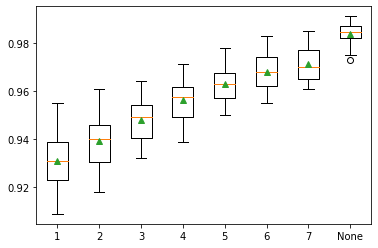

In [12]:

# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return datax, datay
  #return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
df = read_csv(article_file)

properties = list(df.columns.values)
properties.remove('CLASS_LABEL')

print(properties)
print(len(properties))
X = df[properties]
y = df['CLASS_LABEL']
X.shape 
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(49,)),
    keras.layers.Dense(49, activation=tf.nn.relu),
	keras.layers.Dense(49, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu),
])

model.compile(optimizer='SGD',
              loss='mse',
              metrics=['accuracy'])

numEpochs = 500

history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=1, validation_data=(X_val, y_val))




5031/6400 [======================>.......] - ETA: 1s - loss: 0.4953 - accuracy: 0.5047

KeyboardInterrupt: ignored

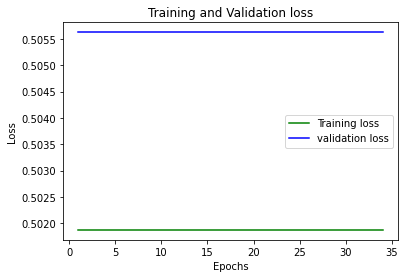

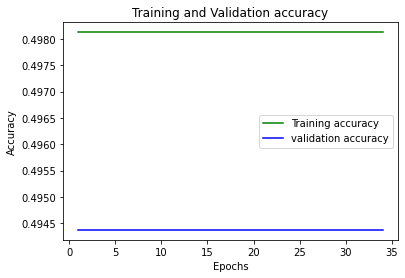

In [ ]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,numEpochs+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,numEpochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()